# Project 1
## Game sales data를 통해 다음 분기에 어떤 게임을 설계해야할지 도출하세요.
### 공통과제
1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까?
3. 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함

### 프로젝트 로드맵
1. 데이터타입, 단위 등을 맞춘다.
2. 결측치를 채우되 너무 많은 시간을 할애하지 않는다.
3. 공통과제를 먼저 해보며 큰 그림을 그린다.
4. 추가적인 분석 내용을 3가지정도 만들어 본다.
5. 결과를 도출한다.
6. 스크립트 작성 및 영상촬영을 한다.

#### 일별 To do list 
- Day 1 - 로드맵 1~3
- Day 2,3 - 로드맵 4
- Day 4 - 로드맵 5
- Day 5 - 로드맵 6

# **Day 1**

## 데이터클렌징
- 그래프 한글 깨짐 문제 해결
- 데이터 타입 확인, 변경
- 결측치 제거
- 에러 잡아내기

In [1]:
# 차트를 그리기 전에, 한글 깨짐 문제를 해결한다
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc("font", family='NanumBarunGothic')
plt.rc("font", family='NanumBarunGothic')
# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

In [3]:
import pandas as pd

df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [5]:
# Year열에서 N/A인 것은 drop 시키고, 
# 네자릿수가 아닌 것 중 20이하이면 앞에 2000년이 생략된 것으로 간주하여 변환해주었다.
# 네자릿수가 아닌 것 중 20초과이면 앞에 1900년이 생략된 것으로 간주하여 변환해주었다.

# 이렇게 변환한 것 중 샘플을 뽑아 출시년도를 검색 해 보았을 때, 일치하는 것을 알 수 있었다.

df.dropna(subset=['Year'],axis=0, inplace=True)
df['Year'] = df['Year'].apply(int)
for i in range(len(df)):
  if len(str((df.iloc[i,3]))) < 4:
    if df.iloc[i,3] <= 20:
      df.iloc[i,3] = df.iloc[i,3] + 2000
    else:
      df.iloc[i,3] = df.iloc[i,3] + 1900


In [6]:
# Genre가 미기재 된 것도 drop 해준다.
df.dropna(subset=['Genre'],axis=0, inplace=True)

In [7]:
# Sales열(6,7,8,9열)에서 아무것도 적혀있지 않은 기본단위는 M(판매량, 매출)이고,
# 일부 값이 M 또는 K가 붙어있으므로 단위를 맞춰준다.
# K는 값을 1000으로 나누고 문자 K를 지우고, M은 값은 그대로 하고 문자 M만 지워준다. 

In [8]:
lst = []
cols= df.columns
for j in cols[:-5:-1]:
  df[j] = df[j].str.replace('M','')

for j in cols[:-5:-1]:
  lst = df.index[df[j].str.contains('K')].tolist()
  for i in lst:
    df.loc[i,j] = pd.to_numeric(df.loc[i,j].replace('K',''))/1000

# 아래 방법은 오래 걸려서 변경함
# for i in range(len(df)):
#   for j in range(6,10):
#     if pd.Series(df.iloc[i,j]).str.contains('K').all() == True:
#       df.iloc[i,j] = pd.to_numeric(df.iloc[i,j].replace('K',''))/1000
#     elif pd.Series(df.iloc[i,j]).str.contains('M').all() == True:
#       df.iloc[i,j] = pd.to_numeric(df.iloc[i,j].replace('M',''))


In [9]:
# Sales 값들을 float로 변환해준다.
for c in cols[:-5:-1]:
  df[c] = pd.to_numeric(df[c])

df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [10]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
df.reset_index(drop=True, inplace=True)
df.head(11)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,9,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


## 공통과제
1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까?
3. 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함

### 1.지역에 따라서 선호하는 게임 장르가 다를까?

- 지역별로 매출 합계를 장르 기준으로 그룹지어보고, tidy 형태로 만든 후 원하는 목적에 맞게 plot을 그려본다. 
- 지역별로 평균 판매량을 장르 기준으로 그룹지어보고, 위와 같은 분석을 한다. 
- 지역과 게임 장르가 연관성이 있는지 Chi-square test를 해본다.
- 지역별 장르전체 매출의 상관계수를 분석 해본다.

In [12]:
df_group = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby('Genre').sum()
df_group.reset_index(inplace=True)
df_group

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.78,513.64,156.61,183.99
1,Adventure,101.92,63.71,51.89,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,400.29,210.20,104.18,72.74
4,Platform,445.38,200.65,130.53,51.45
5,Puzzle,121.58,50.48,56.24,12.44
6,Racing,354.70,235.03,56.32,76.51
7,Role-Playing,318.76,183.10,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,113.17,63.54,31.32


In [13]:
# tidy 형태로 만들어 그래프를 그리기 쉽도록 해주자.
df_tidy = df_group.melt(id_vars='Genre')
df_tidy.rename(columns={'variable':'Region','value':'Total_Sale'}, inplace=True)
df_tidy.head()

,Genre,Region,Total_Sale
0,Action,NA_Sales,858.78
1,Adventure,NA_Sales,101.92
2,Fighting,NA_Sales,220.35
3,Misc,NA_Sales,400.29
4,Platform,NA_Sales,445.38


#### 1-1. 전체 판매량 기준 분석

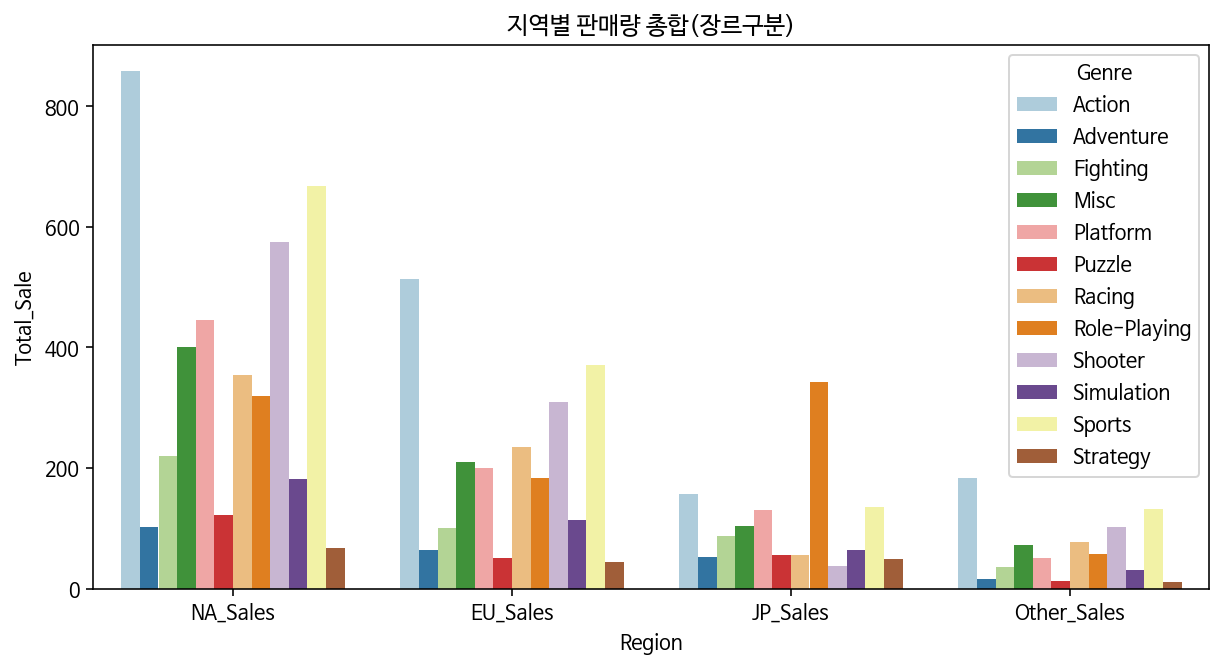

In [14]:
# 특정 지역(북미)에서 전체적인 판매량이 크므로, 장르를 기준으로 묶으면 한 눈에 파악하기 어려웠기 때문에
# 지역별로 묶어 구분한 후, 막대그래프 색상으로 장르를 표시하도록 했다.
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Total_Sale', hue='Genre', palette='Paired', data = df_tidy)
plt.title('지역별 판매량 총합(장르구분)');

  - 위의 barplot을 통해 해석해보면, 북미, 유럽, 기타에서는 Action 장르가 가장 인기인 반면,
  - 일본에서는 롤플레잉이 압도적인 인기임을 알 수 있다.
  - 따라서 지역별로 선호하는 게임 장르가 다르다.

#### 1-2. 장르별 판매량 평균값 분석

In [15]:
# 출시된 게임이 많아서 전체 판매량이 높을 수 있기 때문에, 장르별 평균값을 분석해 보았다.
df_sales = df_tidy.copy()
df_sales.head(10)

,Genre,Region,Total_Sale
0,Action,NA_Sales,858.78
1,Adventure,NA_Sales,101.92
2,Fighting,NA_Sales,220.35
3,Misc,NA_Sales,400.29
4,Platform,NA_Sales,445.38
5,Puzzle,NA_Sales,121.58
6,Racing,NA_Sales,354.70
7,Role-Playing,NA_Sales,318.76
8,Shooter,NA_Sales,574.48
9,Simulation,NA_Sales,181.43


In [16]:
df_count = pd.DataFrame(df.groupby('Genre').count().iloc[:,1]).rename(columns={'Name':'count'}).reset_index()
df_count.head(3)

,Genre,count
0,Action,3242
1,Adventure,1270
2,Fighting,835


In [17]:
df_sales = df_sales.merge(df_count, 'inner')
df_sales['Mean_sale'] = df_sales['Total_Sale']/df_sales['count']
df_sales.head()

,Genre,Region,Total_Sale,count,Mean_sale
0,Action,NA_Sales,858.78,3242,0.264892
1,Action,EU_Sales,513.64,3242,0.158433
2,Action,JP_Sales,156.61,3242,0.048307
3,Action,Other_Sales,183.99,3242,0.056752
4,Adventure,NA_Sales,101.92,1270,0.080252


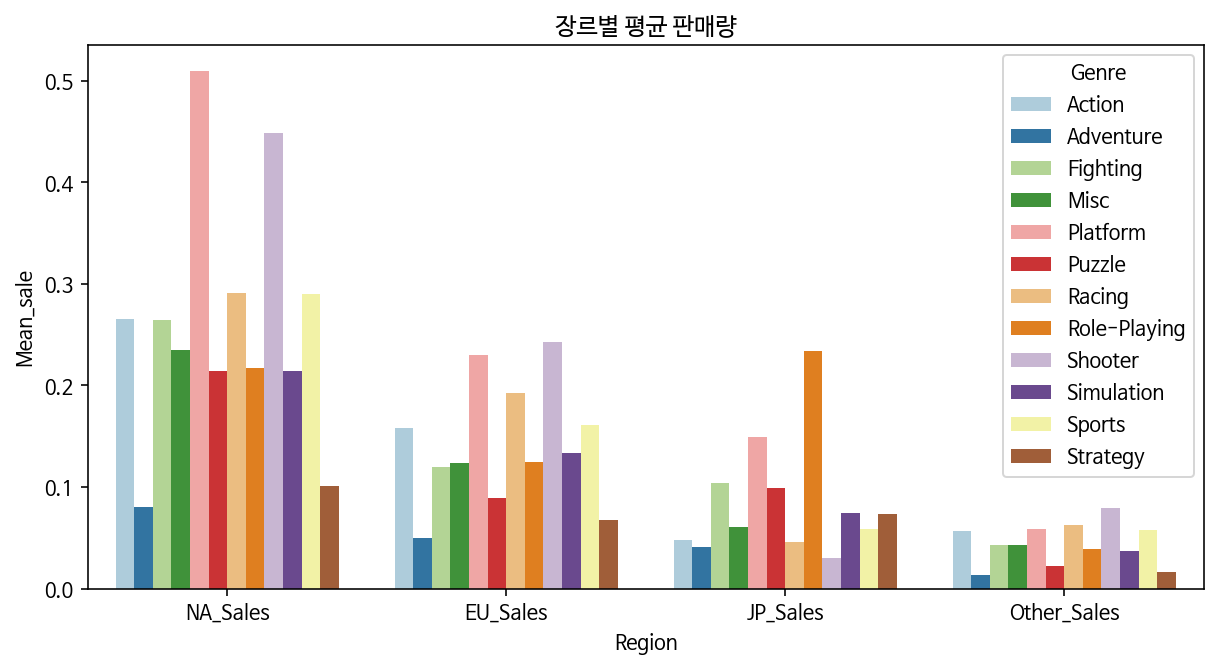

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Mean_sale', hue='Genre', palette='Paired', data = df_sales)
plt.title('장르별 평균 판매량');

  - 장르별 평균 판매량을 비교하여 분석해보면 다음과 같다.
  - 북미, 유럽에서는 Platform, Shooter 장르가 인기있고
  - 일본에서는 롤플레잉이 가장 인기있다.
  - 기타지역에서는 Shooter가 약간 인기있다.
  - 따라서 지역별로 선호하는 게임 장르가 다르다.

#### 1-3. 통계적 가설검정 - 지역과 게임 장르간의 연관관계

In [19]:
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# 귀무가설 : 게임 판매액 데이터에서 지역과 게임 장르는 독립적일 것이다.
# 신뢰도 : 95%
obs = pd.crosstab(df_tidy['Region'], df_tidy['Genre'], values=df_tidy['Total_Sale'], aggfunc='sum')
obs

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Region,,,,,,,,,,,,
EU_Sales,513.64,63.71,99.90,210.20,200.65,50.48,235.03,183.10,310.23,113.17,370.97,44.92
JP_Sales,156.61,51.89,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
NA_Sales,858.78,101.92,220.35,400.29,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.89
Other_Sales,183.99,16.70,36.15,72.74,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


In [20]:
chi2_contingency(obs)

(685.0133262776887,
 6.974269309839113e-123,
 33,
 array([[468.33999756,  64.03579306, 121.26392133, 215.27804549,
         226.3780933 ,  65.81836231, 197.54804301, 246.47574144,
         280.16684715, 106.47843893, 356.88020713,  47.33650931],
        [248.52121857,  33.98012855,  64.34781922, 114.23573147,
         120.12589123,  34.92603598, 104.82743441, 130.79056226,
         148.66850284,  56.50201036, 189.37589021,  25.1187749 ],
        [843.01590495, 115.26496203, 218.27607061, 387.50227885,
         407.48245757, 118.47360157, 355.5881264 , 443.65839198,
         504.30266348, 191.66207887, 642.3873518 ,  85.20611189],
        [153.14287892,  20.93911636,  39.65218883,  70.3939442 ,
          74.02355791,  21.52200013,  64.59639618,  80.59530432,
          91.61198653,  34.81747185, 116.69655087,  15.4786039 ]]))

  - pvalue < 0.05로, 귀무가설 채택
  - 지역과 게임 장르간에는 연관관계가 없다.

#### 1-4. 지역별 장르전체 매출의 상관계수 분석

In [21]:
# 장르별 각 지역의 전체 매출
df_ef = obs.T.reset_index()
df_ef

Region,Genre,EU_Sales,JP_Sales,NA_Sales,Other_Sales
0,Action,513.64,156.61,858.78,183.99
1,Adventure,63.71,51.89,101.92,16.70
2,Fighting,99.90,87.14,220.35,36.15
3,Misc,210.20,104.18,400.29,72.74
4,Platform,200.65,130.53,445.38,51.45
5,Puzzle,50.48,56.24,121.58,12.44
6,Racing,235.03,56.32,354.70,76.51
7,Role-Playing,183.10,342.93,318.76,56.73
8,Shooter,310.23,38.18,574.48,101.86
9,Simulation,113.17,63.54,181.43,31.32


In [22]:
import numpy as np

feature = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in range(len(feature)):
  try:
    x = df_ef[feature[i]]
    y = df_ef[feature[i+1]]
    print(feature[i],',',feature[i+1],'간의 correlation:',np.corrcoef(x,y)[0][1])
  except:
    x = df_ef[feature[i]]
    y = df_ef[feature[0]]
    print(feature[i],',',feature[0],'간의 correlation:',np.corrcoef(x,y)[0][1])

for i in range(0,len(feature)):
  try:
    x = df_ef[feature[i]]
    y = df_ef[feature[i+2]]
    print(feature[i],',',feature[i+2],'간의 correlation:',np.corrcoef(x,y)[0][1])
  except:
    break

NA_Sales , EU_Sales 간의 correlation: 0.9864068852762131
EU_Sales , JP_Sales 간의 correlation: 0.2783226937777636
JP_Sales , Other_Sales 간의 correlation: 0.26355821998218393
Other_Sales , NA_Sales 간의 correlation: 0.9743911627563454
NA_Sales , JP_Sales 간의 correlation: 0.28521859906558983
EU_Sales , Other_Sales 간의 correlation: 0.9943516033548021


- NA, EU, Others 간에는 강한 양의 상관관계가 있다.
- JP은 다른 지역과 상관관계가 별로 없다.
<br><br>
- 따라서, 일본은 다른 지역과 선호하는 게임 장르가 다르다.
- 나머지 지역간에는 선호하는 게임 장르가 거의 비슷하다.

### 2.연도별 게임의 트렌드가 있을까?
- 연도별, 장르별로 그룹화 하여 게임의 트렌드를 라인플롯으로 살펴본다.

In [23]:
df_trend = df.copy()
df_trend['sum']= df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [24]:
df_group2 = df_trend.groupby(['Year','Genre']).sum()
df_group2.reset_index(inplace=True)
df_group2

,Year,Genre,Unnamed: 0,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,1980,Action,13134,0.32,0.02,0.00,0.00,0.34
1,1980,Fighting,14265,0.72,0.04,0.00,0.01,0.77
2,1980,Misc,32606,2.53,0.15,0.00,0.02,2.70
3,1980,Shooter,20737,6.56,0.43,0.00,0.08,7.07
4,1981,Action,218418,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...,...
383,2016,Sports,385300,4.57,7.36,0.78,1.92,14.63
384,2016,Strategy,77904,0.11,0.32,0.05,0.04,0.52
385,2017,Action,5311,0.00,0.00,0.01,0.00,0.01
386,2017,Role-Playing,25342,0.00,0.00,0.04,0.00,0.04


In [25]:
df_ct = pd.crosstab(df_group2['Year'],df_group2['Genre'], values=df_group2['sum'], aggfunc='sum').fillna(0)
df_ct['year_tot']=df_ct.sum(axis=1)
df_ct_yt = df_ct.reset_index()[['Year','year_tot']]
df_ct.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,year_tot
Year,,,,,,,,,,,,,
1980,0.34,0.0,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.00,0.0,10.88
1981,14.79,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0,35.68
1982,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0,28.88
1983,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.49,0.00,3.20,0.0,16.80
1984,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.17,0.0,50.35


In [26]:
cols_p = df_ct.columns
cols_p

for i in cols_p:
  df_ct[i] = df_ct[i]/df_ct['year_tot']

df_ratio = df_ct.drop('year_tot', axis=1).T
df_ratio.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0.031250,0.414518,0.225069,0.170238,0.036743,0.065246,0.370550,0.051152,0.036857,0.063308,0.129431,0.209742,0.050433,0.039356,0.019566,0.040631,0.103658,0.137216,0.154446,0.110852,0.168155,0.172484,0.219885,0.190474,0.183906,0.186497,0.129232,0.173808,0.200263,0.207738,0.198711,0.231050,0.333628,0.354071,0.293711,0.260665,0.280090,0.2,0.0
Adventure,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.201843,0.000000,0.000000,0.000000,0.069500,0.160757,0.001522,0.047210,0.008058,0.021034,0.024718,0.035427,0.030543,0.014687,0.027266,0.028091,0.005940,0.020842,0.018602,0.022313,0.040078,0.036827,0.031043,0.028023,0.030833,0.016293,0.018692,0.018066,0.030592,0.025540,0.0,0.0
Fighting,0.070772,0.000000,0.000000,0.000000,0.000000,0.019462,0.000000,0.249770,0.000000,0.000000,0.000000,0.012101,0.200026,0.190259,0.106917,0.168426,0.090776,0.058686,0.124153,0.057433,0.100526,0.055080,0.063237,0.066657,0.040476,0.042917,0.043790,0.028911,0.052350,0.048330,0.025164,0.042929,0.026318,0.020445,0.047909,0.029714,0.054325,0.0,0.0
Misc,0.248162,0.000000,0.030125,0.127381,0.028798,0.000000,0.000000,0.000000,0.000000,0.017427,0.000000,0.002482,0.064880,0.006523,0.036102,0.072523,0.053641,0.028249,0.046400,0.082999,0.077156,0.049877,0.039663,0.066657,0.075253,0.133309,0.130671,0.151326,0.127408,0.115493,0.149499,0.108283,0.063323,0.072562,0.070395,0.044533,0.016227,0.0,0.0
Platform,0.000000,0.193946,0.174169,0.412500,0.013704,0.800185,0.253236,0.080184,0.587376,0.281280,0.465465,0.236736,0.176123,0.406175,0.363040,0.189422,0.142052,0.108718,0.116902,0.083480,0.079637,0.119686,0.116604,0.119978,0.114328,0.049743,0.096599,0.058264,0.052705,0.061501,0.054083,0.054598,0.051255,0.070950,0.026313,0.023107,0.029350,0.0,0.0


In [27]:
df_ratio.reset_index(inplace=True)
df_ratio

Year,Genre,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,Action,0.031250,0.414518,0.225069,0.170238,0.036743,0.065246,0.370550,0.051152,0.036857,0.063308,0.129431,0.209742,0.050433,0.039356,0.019566,0.040631,0.103658,0.137216,0.154446,0.110852,0.168155,0.172484,0.219885,0.190474,0.183906,0.186497,0.129232,0.173808,0.200263,0.207738,0.198711,0.231050,0.333628,0.354071,0.293711,0.260665,0.280090,0.2,0.0
1,Adventure,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.201843,0.000000,0.000000,0.000000,0.069500,0.160757,0.001522,0.047210,0.008058,0.021034,0.024718,0.035427,0.030543,0.014687,0.027266,0.028091,0.005940,0.020842,0.018602,0.022313,0.040078,0.036827,0.031043,0.028023,0.030833,0.016293,0.018692,0.018066,0.030592,0.025540,0.0,0.0
2,Fighting,0.070772,0.000000,0.000000,0.000000,0.000000,0.019462,0.000000,0.249770,0.000000,0.000000,0.000000,0.012101,0.200026,0.190259,0.106917,0.168426,0.090776,0.058686,0.124153,0.057433,0.100526,0.055080,0.063237,0.066657,0.040476,0.042917,0.043790,0.028911,0.052350,0.048330,0.025164,0.042929,0.026318,0.020445,0.047909,0.029714,0.054325,0.0,0.0
3,Misc,0.248162,0.000000,0.030125,0.127381,0.028798,0.000000,0.000000,0.000000,0.000000,0.017427,0.000000,0.002482,0.064880,0.006523,0.036102,0.072523,0.053641,0.028249,0.046400,0.082999,0.077156,0.049877,0.039663,0.066657,0.075253,0.133309,0.130671,0.151326,0.127408,0.115493,0.149499,0.108283,0.063323,0.072562,0.070395,0.044533,0.016227,0.0,0.0
4,Platform,0.000000,0.193946,0.174169,0.412500,0.013704,0.800185,0.253236,0.080184,0.587376,0.281280,0.465465,0.236736,0.176123,0.406175,0.363040,0.189422,0.142052,0.108718,0.116902,0.083480,0.079637,0.119686,0.116604,0.119978,0.114328,0.049743,0.096599,0.058264,0.052705,0.061501,0.054083,0.054598,0.051255,0.070950,0.026313,0.023107,0.029350,0.0,0.0
5,Puzzle,0.000000,0.063061,0.347645,0.046429,0.062363,0.059500,0.000000,0.000000,0.118195,0.513955,0.121329,0.100527,0.063567,0.068928,0.019313,0.030530,0.019725,0.029194,0.024885,0.005378,0.019004,0.024162,0.013526,0.004791,0.020311,0.044182,0.020972,0.038996,0.022959,0.030458,0.018856,0.009902,0.004805,0.002828,0.004479,0.002635,0.000000,0.0,0.0
6,Racing,0.000000,0.013453,0.054363,0.000000,0.118173,0.000000,0.052859,0.000000,0.045329,0.000000,0.126595,0.035371,0.118860,0.007828,0.027518,0.069118,0.140140,0.158751,0.104950,0.149262,0.099236,0.169897,0.076509,0.146203,0.110150,0.122994,0.066200,0.063872,0.104567,0.051198,0.059072,0.067898,0.039850,0.036818,0.049570,0.030249,0.023564,0.0,0.0
7,Role-Playing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067961,0.214286,0.124550,0.029952,0.091554,0.101148,0.090097,0.121548,0.090003,0.161957,0.221356,0.108519,0.110083,0.189597,0.144091,0.067010,0.114421,0.084870,0.130292,0.062173,0.100661,0.071924,0.088245,0.072029,0.119328,0.103526,0.131921,0.086361,0.136132,0.139136,0.095245,0.8,0.0
8,Shooter,0.649816,0.280830,0.131925,0.029167,0.617676,0.018536,0.104908,0.031797,0.010803,0.016201,0.000000,0.061744,0.003677,0.066971,0.104772,0.047100,0.034720,0.110210,0.038406,0.049085,0.033889,0.075500,0.120892,0.075932,0.113314,0.090653,0.074538,0.116233,0.087979,0.104890,0.130963,0.192898,0.201154,0.177389,0.195758,0.252530,0.256385,0.0,0.0
9,Simulation,0.000000,0.012332,0.000000,0.000000,0.000000,0.000741,0.000000,0.000000,0.000635,0.000000,0.022888,0.066708,0.028106,0.004131,0.034335,0.047327,0.057012,0.047944,0.027864,0.045995,0.016721,0.059463,0.027457,0.059428,0.026300,0.107467,0.042235,0.080107,0.068597,0.050387,0.037307,0.029765,0.036922,0.024545,0.016434,0.021426,0.005503,0.0,1.0


In [28]:
df_ratio_tidy = df_ratio.melt(id_vars='Genre')
df_ratio_tidy.rename(columns={'value':'ratio'}, inplace=True)

#### 2-1. 출시년도 기준 장르별 매출 비율로 트렌드 살피기

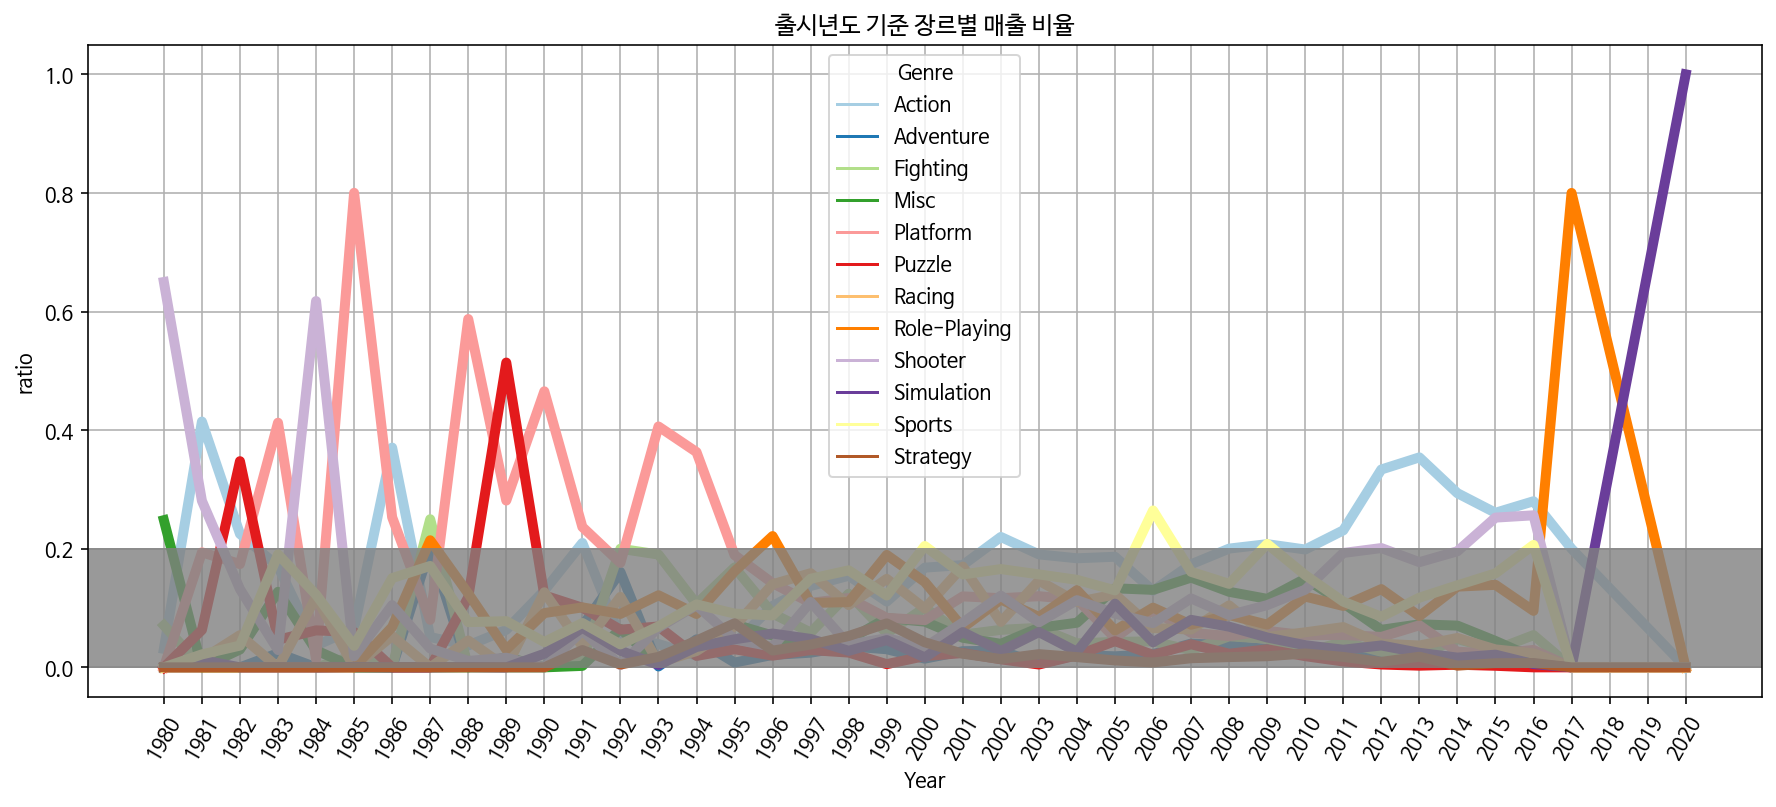

In [29]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(x='Year', y='ratio',hue='Genre', data = df_ratio_tidy, palette='Paired', lw=5)
plt.title('출시년도 기준 장르별 매출 비율')
plt.xticks(list(range(1980,2021)), rotation=60)
plt.axhline(y=0.1, color='gray', linewidth=60, alpha=0.8) # 의미없는 부분은 잘 보이지 않도록 덮음
plt.grid();

  - peak 지점 위주로 보면 80년대에는 Platform, Shooter, Puzzle 게임이 인기였다.
  - 80년대 후반~90년대 초까지 Platform, Puzzle 게임이 계속 인기를 끌다가,
  - 2000년대에는 특별히 peak가 없고 전체적으로 비슷한 분포를 띄었다.
  - 2010년대 들어 Action 게임이 조금 두드러진 모습을 보였으며
  - 2017년부터 2020년까지는 데이터상으로 출시된 게임의 수가 매우 적어 트렌드를 판단하기 어렵다.

#### 2-2. 출시년도별 전체 매출 트렌드

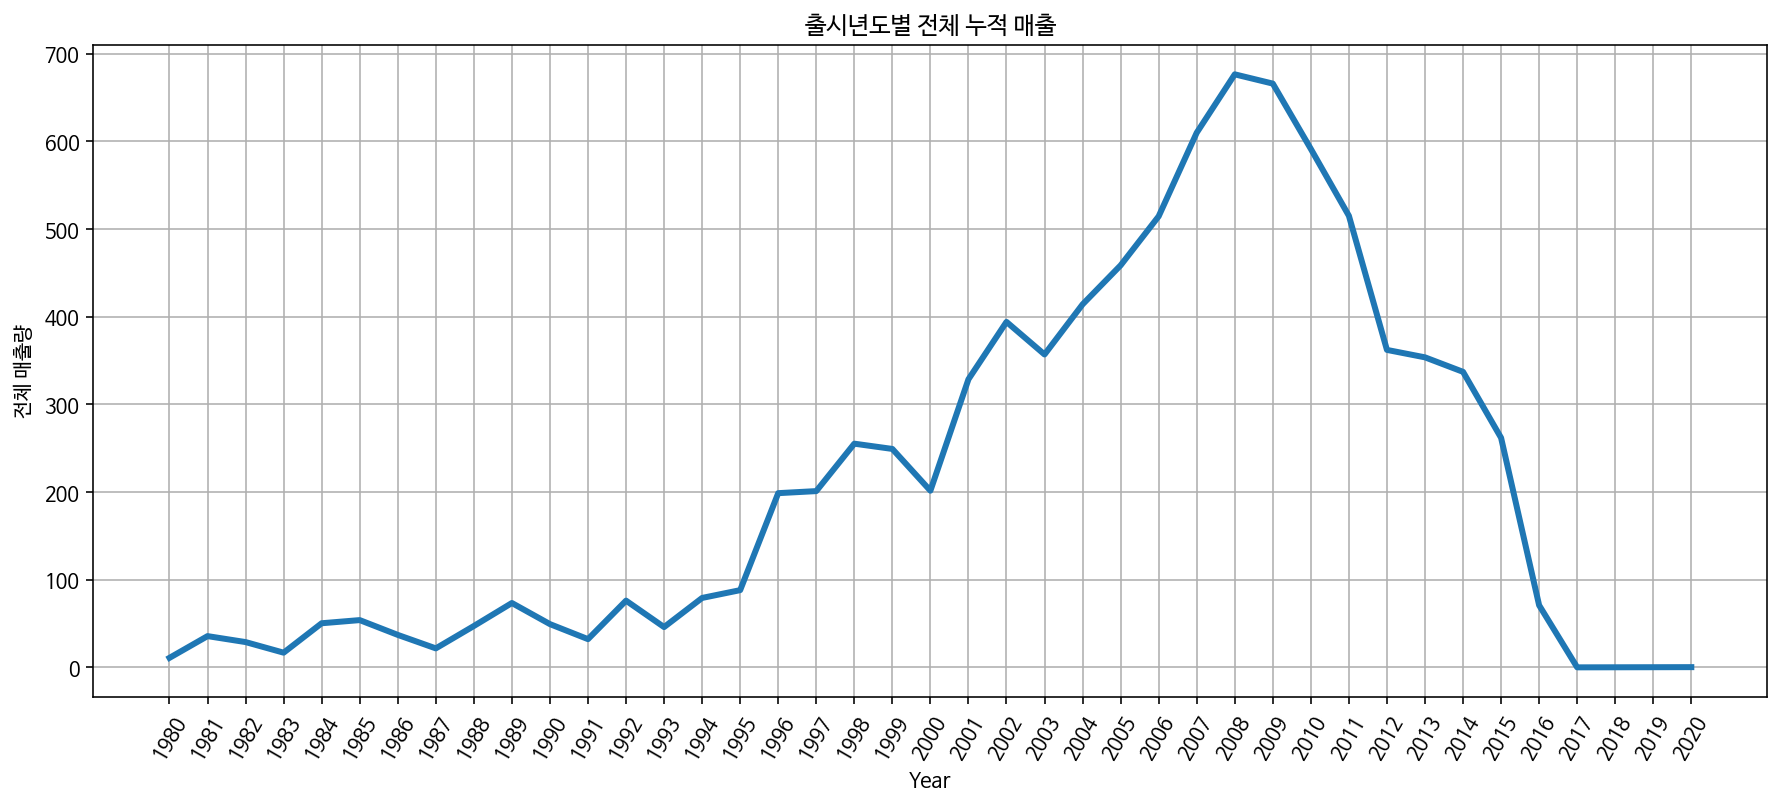

In [30]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Year', y='year_tot', data = df_ct_yt, linewidth=3)
plt.title('출시년도별 전체 누적 매출')
plt.ylabel('전체 매출량')
plt.xticks(list(range(1980,2021)), rotation=60)
plt.grid();

  - 누적 데이터이긴 하나, 보통 출시된 해에 많은 판매량을 기록하므로
  - 위 그래프를 통해 비디오게임 시장에도 변화가 있었음을 알 수 있다.
  - 비디오게임매출은 1990년대 중반부터 상승하다
  - 2008년경 peak를 찍고 급격한 하락세에 접어들었다.

  - 아래 참고자료를 보면 모바일 게임시장의 성장에 따른 변화라고 유추할 수 있다.


  [참고: 50 Years of Gaming History, by Revenue Stream (1970-2020)](https://www.visualcapitalist.com/wp-content/uploads/2020/11/gaming-history-revenue-1200px-up2.jpg)

### 3.매출이 높은 게임에 대한 분석 및 시각화
- 전체 지역에서 매출량의 합이 높은 순서대로 샘플을 50개 선정하여 이 게임들에 대한 분석 및 시각화를 한다.

#### 3-1. 매출 상위 50개 게임을 뽑아 분석 및 시각화 진행

In [31]:
df_max = df_trend.sort_values(by = ['sum'], ascending=False).head(50)
df_max.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
2860,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4120,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12341,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3293,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7685,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [32]:
# 매출이 높은 게임들은 어느 Publisher가 많을까?
# 어떤 플랫폼을 썼을까? 어떤 장르일까? 

df_max_G = df_max[['sum','Genre','Platform', 'Publisher']]
df_max_G.head()

,sum,Genre,Platform,Publisher
2860,82.74,Sports,Wii,Nintendo
4120,40.24,Platform,NES,Nintendo
12341,35.83,Racing,Wii,Nintendo
3293,33.00,Sports,Wii,Nintendo
7685,31.38,Role-Playing,GB,Nintendo


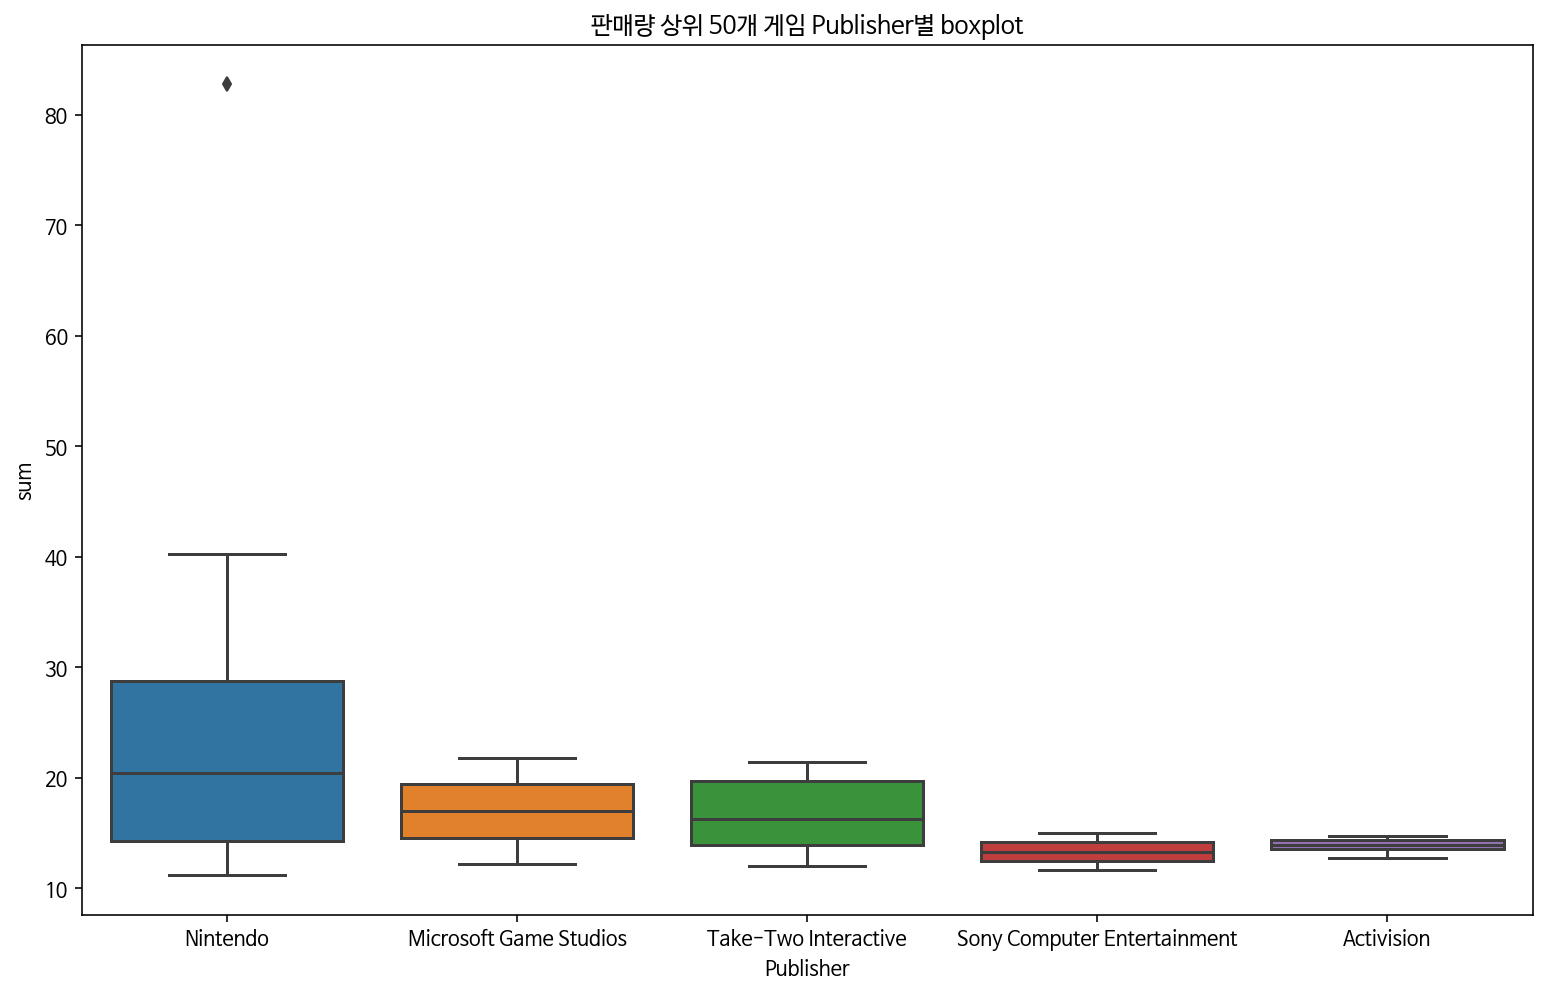

In [33]:
plt.figure(figsize=(13,8))
sns.boxplot(data = df_max_G, x='Publisher', y='sum')
plt.title('판매량 상위 50개 게임 Publisher별 boxplot')
plt.show();

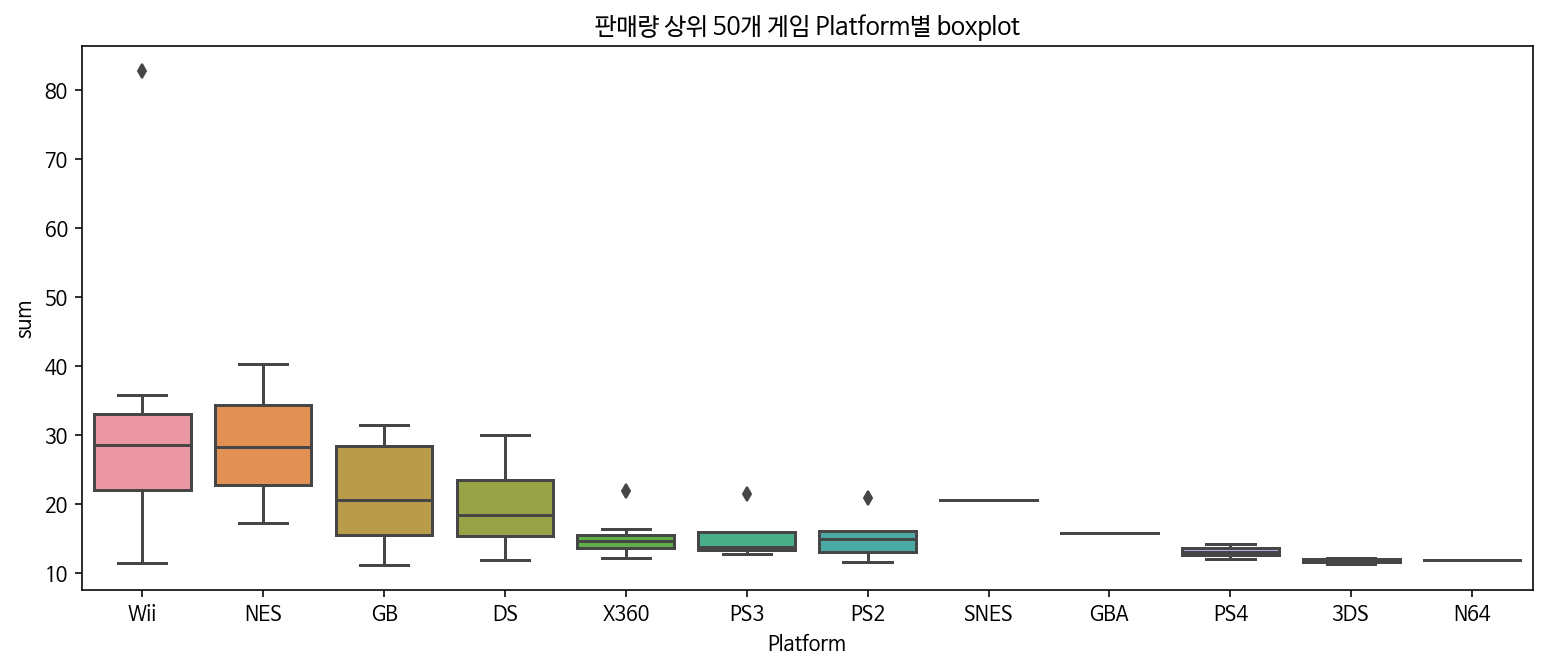

In [34]:
plt.figure(figsize=(13,5))
sns.boxplot(data = df_max_G, x='Platform', y='sum')
plt.title('판매량 상위 50개 게임 Platform별 boxplot');

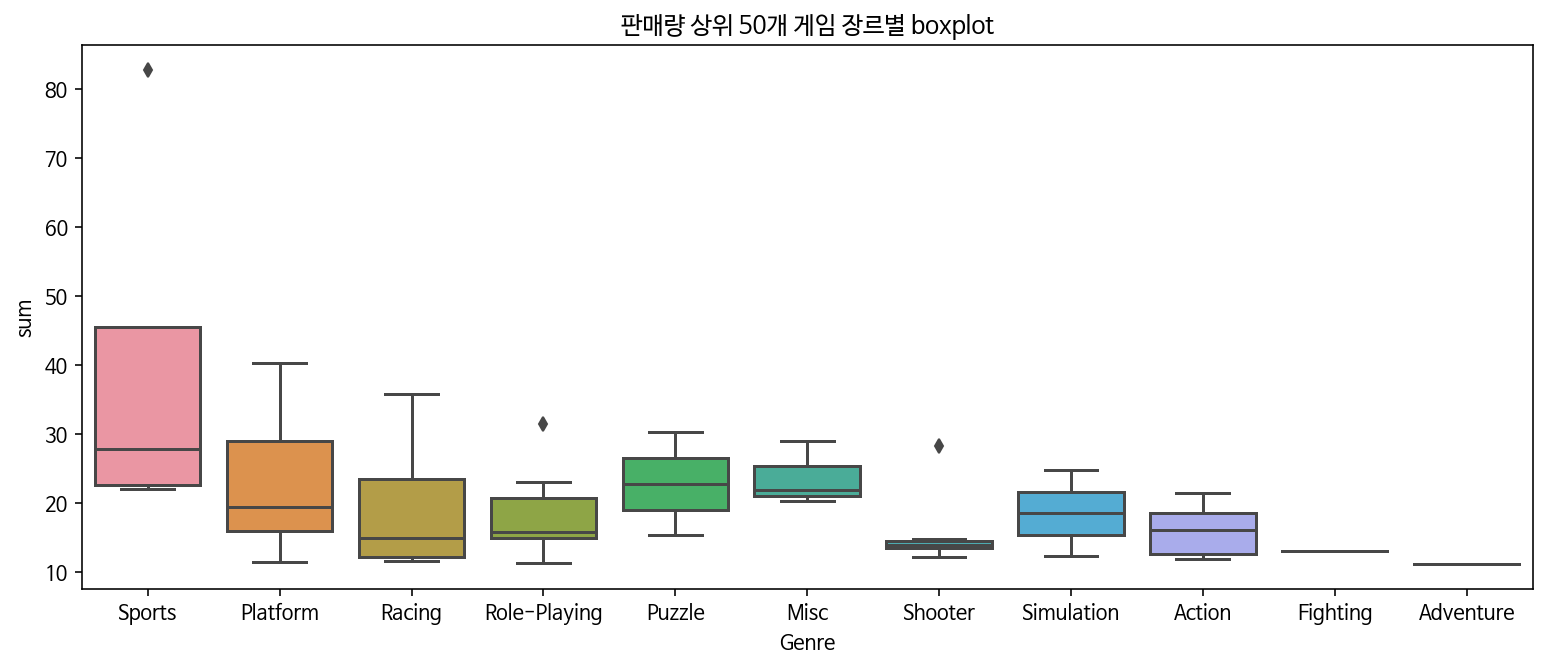

In [35]:
plt.figure(figsize=(13,5))
sns.boxplot(data = df_max_G, x='Genre', y='sum')
plt.title('판매량 상위 50개 게임 장르별 boxplot');

  - Publisher 기준, Nintendo가 가장 인기를 끌었다.
  - Platform 기준, Wii, NES, GB, DS 이 잘 팔렸다.
  - 장르 기준, Sports가 가장 인기이다.

# **Day2 / Day3**

## 개별과제 - 데이터 추가 분석하기

1.시장의 변화를 통해 몇년간의 데이터를 수집할지 정한다.
- 공통과제 2-2에서 보았듯이 과거 40년간 비디오게임 시장의 변화가 여러차례 있었으므로
- 최근 몇년동안의 데이터를 수집하여 새로운 게임 출시에 반영할 것인지 클러스터링을 통해 구해본다.

2.어떤 플랫폼을 선택할 것인지?
- 2008년 이후 출시된 비디오게임의 Platform별 판매량 분석
- 기술발전에 따라 Platform도 단종된 구형모델을 제외하고, 현재 사용되는 기기에서 호환될 수 있는 게임을 개발하는 것이 필요하다.

3.장르별 시장규모 분석 : 어떤 장르를 선택할 것인지
- 공통과제 2-1에서 보았듯이 과거와 최근 선호장르 트렌드가 다르기 때문에 최근 12년간 데이터로 분석한다.

4.Publisher를 어디로 할 것인지?
- 공통과제 3-1을 통해 전체 게임의 Publishing에 대해서는 Publisher 중 Nintendo가 가장 뛰어남을 알았다.
- 그러나 최근 12년간 많은 판매를 올린 PS에 있어서는 Nintendo가 Publishing 하지 않기 때문에 조건에 맞게 분석해본다.

### 1.시장의 변화에 따라 몇년간의 데이터를 수집할까?
- Year과 지역별 Sales 합계를 K-means clustering으로 군집화하여 최근 몇년간의 데이터를 수집할지 정한다.
- 군집 수는 K값을 결정하는 객관적인 방법인 Elbow method를 사용한다.

In [36]:
df_test = df_trend.copy()
df_1 = df_test[['Year','sum']]
df_1

,Year,sum
0,2008,0.04
1,2009,0.18
2,2010,0.02
3,2010,0.04
4,2010,0.25
...,...,...
16272,2006,0.20
16273,2005,0.01
16274,2015,0.79
16275,2013,0.38


In [37]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_1)
    sum_of_squared_distances.append(km.inertia_)

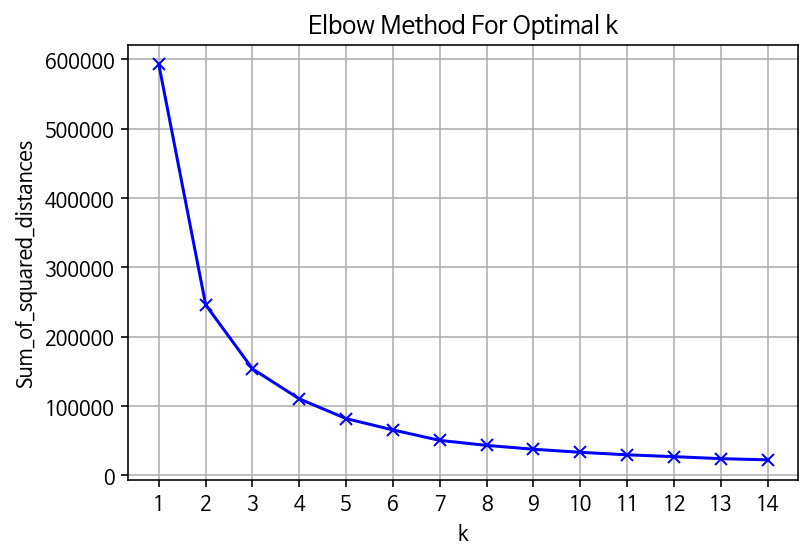

In [38]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(list(range(1,15)))
plt.grid()
plt.show();

- Elbow method를 통해 군집 수는 3 으로 클러스터링을 진행하였다.

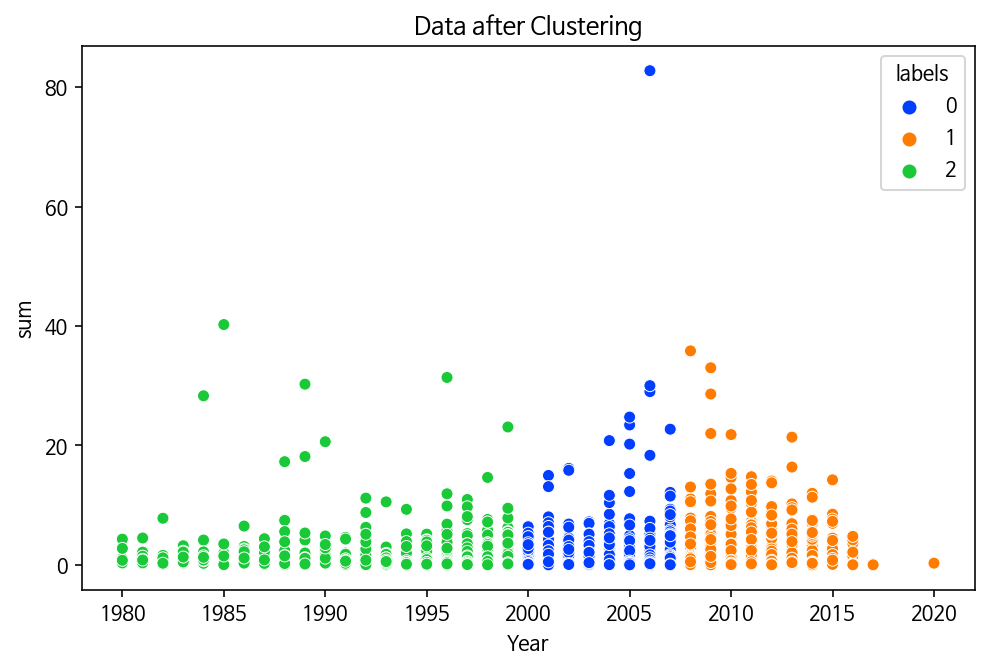

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_1)
labels = kmeans.labels_
df_1['labels'] = pd.Series(labels).values

plt.figure(figsize=(8,5))
sns.scatterplot(x = df_1['Year'], y = df_1['sum'], hue=df_1['labels'], palette='bright')
plt.title('Data after Clustering')
plt.show();

- 3개의 군집으로 나누어보았을 때, 2000년과 2008년을 기점으로 나뉘는 것을 확인할 수 있다.
- 따라서 2008년부터 현재까지의 데이터를 통해 분석해보려고 한다.

### 2.어떤 플랫폼을 선택할 것인지?
- 최근 12년간 출시된 비디오게임의 Platform별 판매량 분석
- 기술발전에 따라 Platform도 단종된 구형모델을 제외하고, 현재 사용되는 기기에서 호환될 수 있는 게임을 개발하는 것이 필요하다.

In [40]:
df_PF = df_trend.copy()
df_PF = df_PF[(df_PF['Year']>=2008)][['Platform','Year','sum']].groupby(['Platform','Year']).sum().reset_index()
df_PF

,Platform,Year,sum
0,3DS,2011,62.58
1,3DS,2012,51.10
2,3DS,2013,41.51
3,3DS,2014,43.12
4,3DS,2015,26.97
...,...,...,...
79,XB,2008,0.18
80,XOne,2013,18.61
81,XOne,2014,52.44
82,XOne,2015,57.65


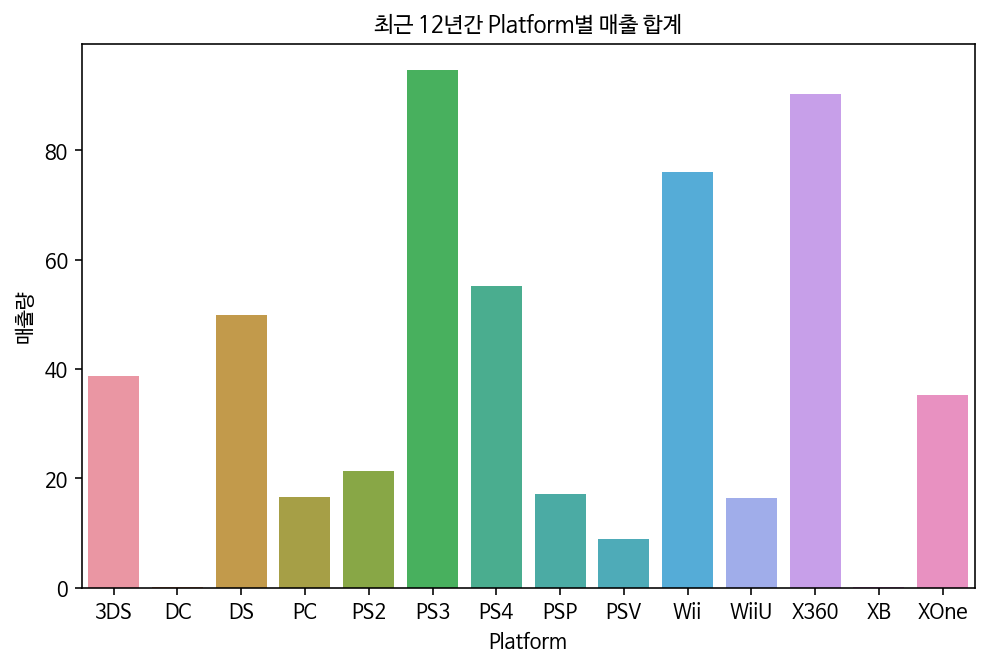

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_PF, y='sum', x='Platform', ci=None)
plt.title('최근 12년간 Platform별 매출 합계', fontdict={'size':11})
plt.ylabel('매출량')
plt.show();

- 공통과제 3-1에서 살펴본 40년간의 상위 Platform과는 확연히 다른 모습이다.
- 2008년부터 현재까지 가장 잘 팔린 Platform은 PS3 였다.
- PS(플레이스테이션) 시리즈는 PS4를 거쳐 최근 신형모델인 PS5도 출시되었다.
<br><br>
- 다음으로는 X360인데, X360은 2005년 출시된 모델이고 XOne은 2013년 출시된 모델이다.
- 최근 Xbox Series X와 S가 출시되었다고 한다.
<br><br>
- 따라서 신규 게임을 개발한다면 PS 시리즈 호환용 또는 Xbox 시리즈 호환용으로 만드는 것이 좋을 것으로 판단된다.

### 3.장르별 시장규모 분석
- 전체 데이터는 약 40년간이지만, 공통과제 2-1번을 보면 연도별 게임 트렌드가 바뀌었음을 알 수 있다.
- 따라서 최근 시장상황을 반영하기 위해 2008년~2020년 12년간의 장르별 시장규모를 분석한다.
- 전 지역에서의 매출 합계를 기준으로 분석한다.


In [42]:
df_10 = pd.crosstab(df_group2['Year'],df_group2['Genre'], values=df_group2['sum'], aggfunc='sum').fillna(0)
df_10 = df_10.reset_index()
df_10 = df_10[df_10['Year']>=2008].reset_index(drop=True)
df_10.set_index('Year', inplace=True)

In [43]:
df_10.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2008,135.46,24.91,35.41,86.18,35.65,15.53,70.73,59.69,59.51,46.40,95.24,11.70
2009,138.32,20.67,32.18,76.90,40.95,20.28,34.09,47.96,69.84,33.55,138.59,12.51
2010,117.50,16.57,14.88,88.40,31.98,11.15,34.93,70.56,77.44,22.06,92.02,13.82
2011,119.00,15.88,22.11,55.77,28.12,5.10,34.97,53.32,99.35,15.33,57.06,9.03
2012,120.81,5.90,9.53,22.93,18.56,1.74,14.43,47.77,72.84,13.37,30.90,3.33


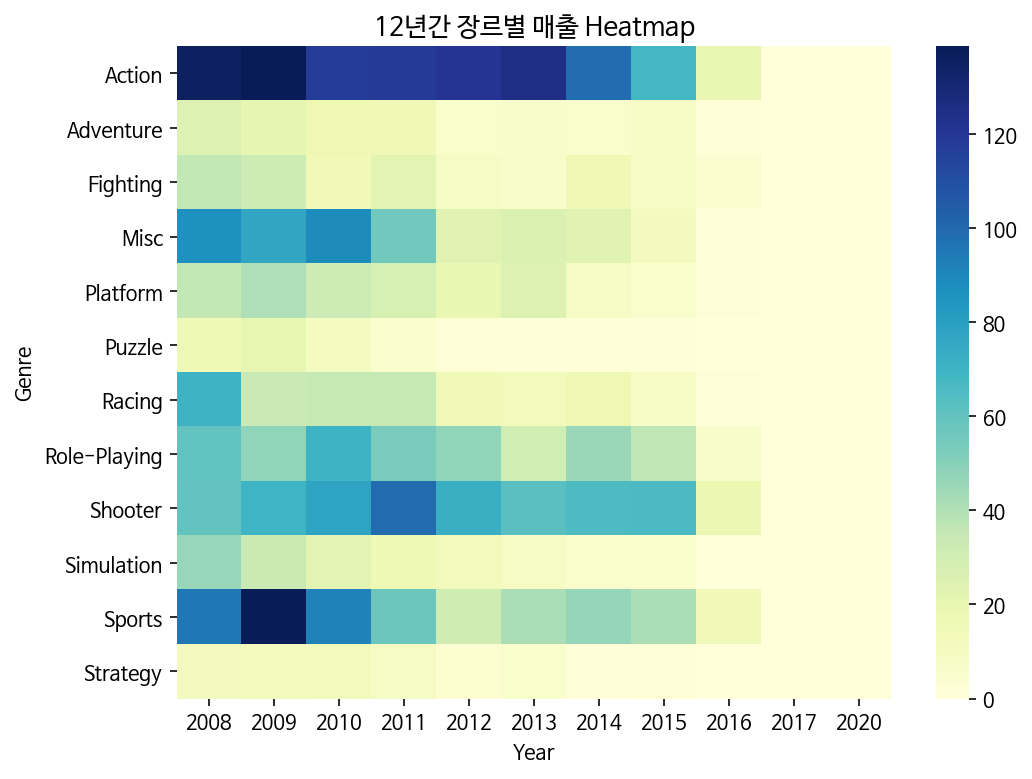

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df_10.T, cmap='YlGnBu')
plt.title('12년간 장르별 매출 Heatmap', fontsize=13)
plt.show();

- 매출량에 따라 색상을 달리한 heatmap을 보면, 푸른색을 띄고 있는 Action, Sports, Shooter가 지난 12년간 가장 인기였음을 알 수 있다.
- 그 다음으로는 Role-Playing, Misc 장르의 매출이 높은 것을 알 수 있다.
- 따라서, 장르는 Action ,Sports, Shooter를 출시하는 것이 유리하다.

### 4.Publisher를 어디로 할 것인지?
- 12년간 Platform 중 PS3,PS4와 X360,XOne의 Publisher로 일한 회사의 리스트를 만들고
- 데이터 중 총 매출량 기준, 상위의 Publisher 회사를 선정한다.

In [45]:
df_pub = df_trend.copy()
df_pub = df_pub[(df_pub['Year'] >= 2008)]

In [46]:
df_pub_pf = df_pub[(df_pub['Platform'].isin(['PS3','PS4','X360','XOne']))]
df_pub1 = df_pub_pf[['Platform','Publisher','sum']].groupby(['Publisher','Platform']).sum().reset_index().sort_values(by='sum', ascending=False)
df_pub1

,Publisher,Platform,sum
95,Electronic Arts,X360,151.51
93,Electronic Arts,PS3,151.06
15,Activision,X360,129.85
166,Microsoft Game Studios,X360,128.12
227,Sony Computer Entertainment,PS3,117.30
...,...,...,...
137,Kaga Create,PS3,0.01
265,Tradewest,X360,0.01
132,"Interworks Unlimited, Inc.",PS3,0.01
97,Epic Games,PS4,0.01


In [47]:
df_pub2 = pd.crosstab(index=df_pub1['Publisher'], columns=df_pub1['Platform'], values=df_pub1['sum'], aggfunc='sum').fillna(0)
df_pub2['total']=df_pub2.sum(axis=1)
df_pub2 = df_pub2.sort_values(by='total', ascending=False).head(10)
df_pub2

Platform,PS3,PS4,X360,XOne,total
Publisher,,,,,
Electronic Arts,151.06,55.36,151.51,29.40,387.33
Activision,111.96,40.25,129.85,23.51,305.57
Take-Two Interactive,81.26,25.34,83.71,12.99,203.30
Ubisoft,58.92,31.68,66.02,17.91,174.53
Microsoft Game Studios,0.00,0.00,128.12,25.43,153.55
Sony Computer Entertainment,117.30,28.32,0.00,0.00,145.62
Warner Bros. Interactive Entertainment,27.64,19.56,30.13,9.21,86.54
Bethesda Softworks,20.66,14.26,24.94,7.65,67.51
Namco Bandai Games,37.99,11.12,11.74,2.47,63.32


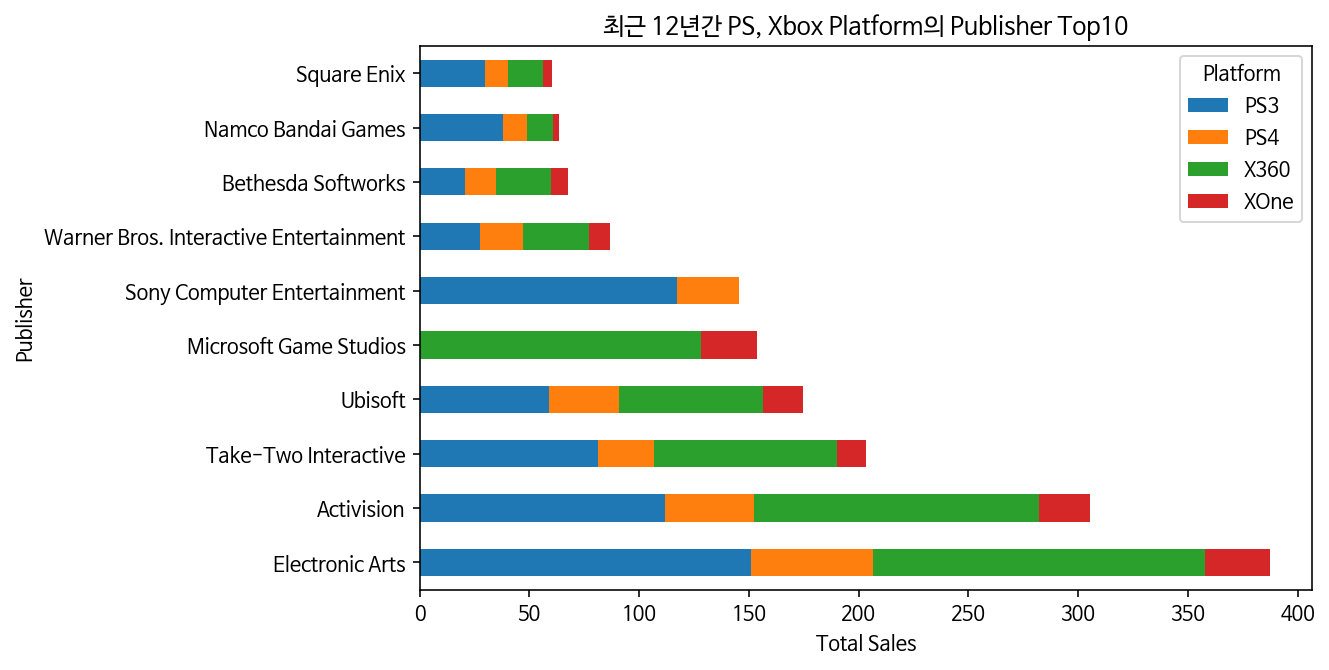

In [48]:
df_pub2.drop('total', axis=1).plot.barh(stacked=True, figsize=(8,5))
plt.title('최근 12년간 PS, Xbox Platform의 Publisher Top10')
plt.xlabel('Total Sales');

- 1~4위의 Publisher들은 조건으로 제시한 네가지 Platform의 게임을 모두 Publish하고 있는 것을 알 수 있다.
- 따라서 Publisher는 Electronic Arts, Activision, Take-Two Interactive, Ubisoft로 하는 것이 좋다.

# Day4

## 종합분석 및 결과도출

### 베이지안 추론
 - 베이지안 추론을 통해, 사전확률을 최근 12년간 매출 상위 30%(약 30만장)에 들 확률로 두고 위에서 선정한 Platform에 대해 성공확률을 계산해본다.
 - 사전확률을 업데이트하여 위에서 선정한 장르 중 어떤 장르에서 가장 성공확률이 높을지 확인하고
 - 이렇게 구한 확률을 다시 사전확률로 업데이트하여 어떤 Publisher가 가장 성공확률이 높을지 확인한다.
 - 이를 종합하여 결과를 도출한다.

#### 1.Platform 선정

In [49]:
# 12년간의 데이터 중 총 매출 기준 상위 30%의 데이터를 뽑아낸다.
pS = 0.3
pS_ = 1-pS
df_succeed = df_pub.sort_values(by='sum', ascending=False).head(round(len(df_pub)*pS))
df_n_succeed = df_pub.drop(df_succeed.index, axis=0)

In [50]:
# 성공한 것 중 Platform이 PS3 또는 PS4 일 확률 pPS
# 성공한 것 중 Platform이 PS3 또는 PS4가 아닐 확률 pP_S
pPS = (df_succeed['Platform'].isin(['PS3','PS4'])).sum() /len(df_succeed)
pP_S = 1-pPS
print(pPS,pP_S)

# 성공하지 못한 것 중 Platform이 PS3 또는 PS4일 확률 pPS_
# 성공하지 못한 것 중 Platform이 PS3 또는 PS4가 아닐 확률 pP_S_

pPS_ = (df_n_succeed['Platform'].isin(['PS3','PS4'])).sum() /len(df_n_succeed)
pP_S_ = 1-pPS_
print(pPS_,pP_S_)

# 따라서, Platform이 PS3 또는 PS4인 경우 성공할 확률 P(S|P) = P(P|S)*P(S) / P(P)
p_S_P = pPS*pS / (pPS*pS + pPS_*pS_)
print('Platform이 PS3 또는 PS4인 경우 성공할 확률:', round(p_S_P*100,2),'%')

0.281419624217119 0.718580375782881
0.15106497225702523 0.8489350277429748
Platform이 PS3 또는 PS4인 경우 성공할 확률: 44.39 %


In [51]:
# 성공한 것 중 Platform이 X360 또는 XOne 일 확률 pXS
# 성공한 것 중 Platform이 X360 또는 XOne가 아닐 확률 pX_S
pXS = (df_succeed['Platform'].isin(['X360','XOne'])).sum() /len(df_succeed)
pX_S = 1-pXS
print(pXS,pX_S)

# 성공하지 못한 것 중 Platform이 X360 또는 XOne일 확률 pXS_
# 성공하지 못한 것 중 Platform이 X360 또는 XOne가 아닐 확률 pX_S_

pXS_ = (df_n_succeed['Platform'].isin(['X360','XOne'])).sum() /len(df_n_succeed)
pX_S_ = 1-pXS_
print(pXS_,pX_S_)

# 따라서, Platform이 X360 또는 XOne인 경우 성공할 확률 P(S|X) = P(X|S)*P(S) / P(X)
p_S_X = pXS*pS / (pXS*pS + pXS_*pS_)
print('Platform이 X360 또는 XOne인 경우 성공할 확률:', round(p_S_X*100,2),'%')

0.23131524008350732 0.7686847599164927
0.11759441560766064 0.8824055843923394
Platform이 X360 또는 XOne인 경우 성공할 확률: 45.74 %


  - 사전확률을 성공가능성 30%로 두고 시작하였을 때의 결과는 다음과 같다.
  - Platform이 PS3 또는 PS4인 경우 성공할 확률: 44.39 %이다.
  - Platform이 X360 또는 XOne인 경우 성공할 확률: 45.74 %이다.
  - 차이가 1% 정도로 미미하므로 장르선정 시 두 Platform 모두 적용 해 본다.

#### 2.Genre 선정
- 사전확률을 업데이트해서 장르별로 분석해보자
- 위에서 구한 확률을 사전확률로 두고, 장르별로 비교하여 사후확률을 구해본다.
- 개별과제 3번에서 선정한 장르인 Action, Sports, Shooter에 대해 비교한다.

In [52]:
def prob_A_given_B(prob_prior, false_positive_rate, true_positive_rate):

  PA = prob_prior
  PnA = 1 - PA
  fpr = false_positive_rate
  tpr = true_positive_rate

  p_A_B = PA*tpr / ((PA*tpr)+(PnA*fpr))
  return p_A_B


In [53]:
print('Platform: PS3, PS4 일 때,')

for i in ['Action','Sports','Shooter']:
  df_PS01 = df_succeed[(df_succeed['Platform'].isin(['PS3','PS4']))]
  df_PS01_ = df_n_succeed[(df_n_succeed['Platform'].isin(['PS3','PS4']))]

  test = prob_A_given_B(p_S_P, (df_PS01_['Genre']==i).sum()/len(df_PS01_), (df_PS01['Genre']==i).sum()/len(df_PS01))
  
  print(i,'장르에서 성공할 확률로 업데이트하면 :', round(test*100,2),'% 이다.')

Platform: PS3, PS4 일 때,
Action 장르에서 성공할 확률로 업데이트하면 : 44.75 % 이다.
Sports 장르에서 성공할 확률로 업데이트하면 : 48.41 % 이다.
Shooter 장르에서 성공할 확률로 업데이트하면 : 65.69 % 이다.


In [54]:
print('Platform: X360, XOne 일 때,')
for i in ['Action','Sports','Shooter']:
  df_PS02 = df_succeed[(df_succeed['Platform'].isin(['X360','XOne']))]
  df_PS02_ = df_n_succeed[(df_n_succeed['Platform'].isin(['X360','XOne']))]

  test = prob_A_given_B(p_S_X, (df_PS02_['Genre']==i).sum()/len(df_PS02_), (df_PS02['Genre']==i).sum()/len(df_PS02))
  
  print(i,'장르에서 성공할 확률로 업데이트하면 :', round(test*100,2),'% 이다.')

Platform: X360, XOne 일 때,
Action 장르에서 성공할 확률로 업데이트하면 : 45.5 % 이다.
Sports 장르에서 성공할 확률로 업데이트하면 : 49.49 % 이다.
Shooter 장르에서 성공할 확률로 업데이트하면 : 59.16 % 이다.


*Platform: PS3, PS4 일 때,*
- Action 장르에서 성공할 확률로 업데이트하면 : 44.75 % 이다.
- Sports 장르에서 성공할 확률로 업데이트하면 : 48.41 % 이다.
- Shooter 장르에서 성공할 확률로 업데이트하면 : 65.69 % 이다.
<br><br>

*Platform: X360, XOne 일 때,*
- Action 장르에서 성공할 확률로 업데이트하면 : 45.5 % 이다.
- Sports 장르에서 성공할 확률로 업데이트하면 : 49.49 % 이다.
- Shooter 장르에서 성공할 확률로 업데이트하면 : 59.16 % 이다.
<br><br>
- 이 중에서는 Platform: PS3, PS4 일 때 Shooter 장르의 성공 확률이 가장 높다.

#### 3.Publisher 선정

In [55]:
for i in ['Electronic Arts', 'Activision', 'Take-Two Interactive', 'Ubisoft']:
  df_PS1 = df_PS01[(df_PS01['Genre'].isin(['Shooter']))]
  df_PS1_ = df_PS01_[(df_PS01_['Genre'].isin(['Shooter']))]

  test = prob_A_given_B(0.6569, (df_PS1_['Publisher']==i).sum()/len(df_PS1_), (df_PS1['Publisher']==i).sum()/len(df_PS1))

  print('Publisher를',i,'로 했을 경우 성공할 확률로 업데이트하면 :', round(test*100,2),'% 이다.')

Publisher를 Electronic Arts 로 했을 경우 성공할 확률로 업데이트하면 : 90.0 % 이다.
Publisher를 Activision 로 했을 경우 성공할 확률로 업데이트하면 : 79.99 % 이다.
Publisher를 Take-Two Interactive 로 했을 경우 성공할 확률로 업데이트하면 : 73.33 % 이다.
Publisher를 Ubisoft 로 했을 경우 성공할 확률로 업데이트하면 : 76.92 % 이다.


*Platform: PS3, PS4 일 때,*

- Publisher를 Electronic Arts 로 했을 경우 성공할 확률로 업데이트하면 : 90.0 % 이다.
- Publisher를 Activision 로 했을 경우 성공할 확률로 업데이트하면 : 79.99 % 이다.
- Publisher를 Take-Two Interactive 로 했을 경우 성공할 확률로 업데이트하면 : 73.33 % 이다.
- Publisher를 Ubisoft 로 했을 경우 성공할 확률로 업데이트하면 : 76.92 % 이다.
<br><br>
- 이 중에서는 Electronic Arts 의 성공 확률이 가장 높다.

In [56]:
for i in ['Electronic Arts', 'Activision', 'Take-Two Interactive', 'Ubisoft']:
  df_PS2 = df_PS02[(df_PS02['Genre'].isin(['Shooter']))]
  df_PS2_ = df_PS02_[(df_PS02_['Genre'].isin(['Shooter']))]

  test = prob_A_given_B(0.5916, (df_PS2_['Publisher']==i).sum()/len(df_PS2_), (df_PS2['Publisher']==i).sum()/len(df_PS2))

  print('Publisher를',i,'로 했을 경우 성공할 확률로 업데이트하면 :', round(test*100,2),'% 이다.')

Publisher를 Electronic Arts 로 했을 경우 성공할 확률로 업데이트하면 : 88.0 % 이다.
Publisher를 Activision 로 했을 경우 성공할 확률로 업데이트하면 : 74.19 % 이다.
Publisher를 Take-Two Interactive 로 했을 경우 성공할 확률로 업데이트하면 : 73.33 % 이다.
Publisher를 Ubisoft 로 했을 경우 성공할 확률로 업데이트하면 : 90.91 % 이다.


*Platform: X360, XOne일 때,*

- Publisher를 Electronic Arts 로 했을 경우 성공할 확률로 업데이트하면 : 88.0 % 이다.
- Publisher를 Activision 로 했을 경우 성공할 확률로 업데이트하면 : 74.19 % 이다.
- Publisher를 Take-Two Interactive 로 했을 경우 성공할 확률로 업데이트하면 : 73.33 % 이다.
- Publisher를 Ubisoft 로 했을 경우 성공할 확률로 업데이트하면 : 90.91 % 이다.
<br><br>
- 이 중에서는 Ubisoft 의 성공 확률이 가장 높다.

## 결론
이번 프로젝트를 통해 도출한 결과는 다음과 같다. 

전세계 누적 30만장 이상의 판매고를 목표로 최선의 Platform, Genre, Publisher 조합을 선정한 결과,


1안)
- Platform : Xbox시리즈 (X360, XOne, X Series X,S)
- Genre : Shooter
- Publisher : Ubisoft
- 성공 확률 : 90.91 %

2안)
- Platform : PlayStation시리즈 (PS3, PS4, PS5)
- Genre : Shooter
- Publisher : Electronic Arts
- 성공 확률 : 90.0 %